In [1]:
# %%
import torch
import matplotlib.pyplot as plt
from torch import nn
from pathlib import Path

# Define the weight and bias
weight = 0.7
bias = 0.3

# Define the range for X
start = 0
end = 1
skip = 0.02

In [2]:

import torch
# %%

# Create X and y tensors
X = torch.arange(start, end, skip).unsqueeze(dim=1)
y = weight * X + bias

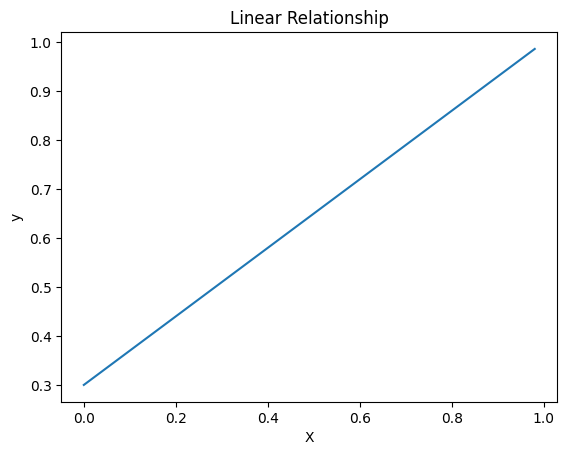

In [3]:

# Plot the data
plt.plot(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Relationship")
plt.show()

In [4]:

# %%

# Print the first 10 values of X and y
print("First 10 values of X:", X[:10])
print("First 10 values of y:", y[:10])

# Print the lengths of X and y
print("Length of X:", len(X))
print("Length of y:", len(y))

# %%

# Data splitting
training_split = int(0.8 * len(X))
training_X, training_y = X[:training_split], y[:training_split]
testing_X, testing_y = X[training_split:], y[training_split:]
print(len(training_X), len(training_y), len(testing_X), len(testing_y))

# %%


First 10 values of X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
First 10 values of y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Length of X: 50
Length of y: 50
40 40 10 10


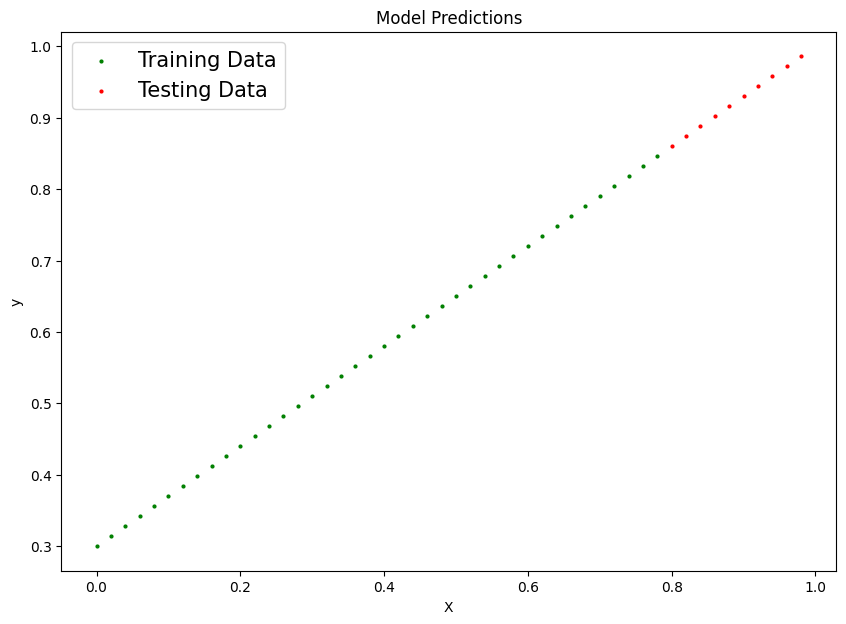

In [5]:

# Function to plot predictions
def plot_predictions(
    train_data=training_X,
    train_label=training_y,
    test_data=testing_X,
    test_label=testing_y,
    predictions=None,
):
    plt.figure(figsize=(10, 7))
    plt.scatter(
        train_data.numpy(), train_label.numpy(), label="Training Data", s=4, color="g"
    )
    plt.scatter(
        test_data.numpy(), test_label.numpy(), label="Testing Data", s=4, color="r"
    )
    if predictions is not None:
        plt.scatter(
            test_data.numpy(), predictions.numpy(), label="Predictions", s=4, color="y"
        )
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Predictions")
    plt.legend(prop={"size": 15})
    plt.show()


plot_predictions()

In [6]:

# %%


# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


torch.manual_seed(42)
model_0 = LinearRegression()
print(model_0.state_dict())

OrderedDict({'weight': tensor([0.3367]), 'bias': tensor([0.1288])})


In [7]:

# %%

# Training setup
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# %%

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_0 = model_0.to(device)
training_X = training_X.to(device)
training_y = training_y.to(device)
testing_X = testing_X.to(device)
testing_y = testing_y.to(device)

# %%

# Training loop
epochs = 200
epochs_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(training_X)
    loss = loss_fn(y_pred, training_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.no_grad():
        test_pred = model_0(testing_X)
        test_loss = loss_fn(test_pred, testing_y)
        if epoch % 10 == 0:
            epochs_count.append(epoch)
            loss_values.append(loss.item())
            test_loss_values.append(test_loss.item())
            print(
                f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}"
            )
            print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weight': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weight': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weight': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weight': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weight': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weight': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.034760899

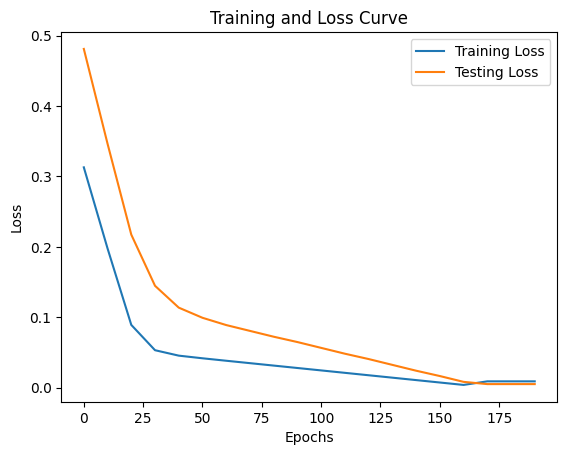

In [8]:

# %%

# Plot loss curves
plt.plot(epochs_count, loss_values, label="Training Loss")
plt.plot(epochs_count, test_loss_values, label="Testing Loss")
plt.title("Training and Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# %%

In [9]:

# Save the model
Model_path = Path("models")
Model_path.mkdir(parents=True, exist_ok=True)
Model_name = "0_1_model.pth"
Model_save_path = Model_path / Model_name
print(f"Saving model to {Model_save_path}")
torch.save(obj=model_0.state_dict(), f=Model_save_path)

# %%

Saving model to models/0_1_model.pth


True


/tmp/ipykernel_29489/739233682.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model_0.load_state_dict(torch.load(Model_save_path))


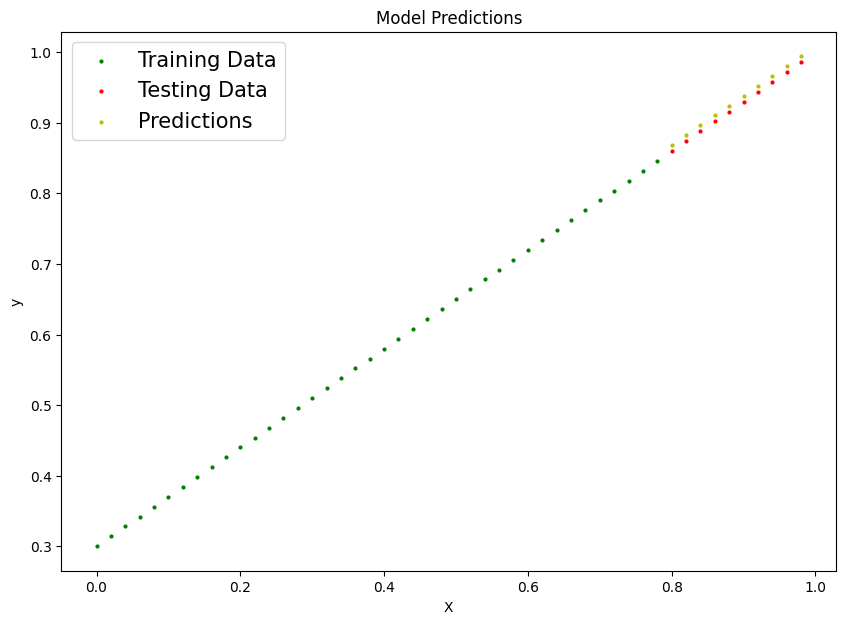

In [10]:

# Load the model
load_model_0 = LinearRegression()
load_model_0.load_state_dict(torch.load(Model_save_path))
load_model_0 = load_model_0.to(device)

# Inference and comparison
model_0.eval()
load_model_0.eval()
with torch.no_grad():
    y_pred_new = model_0(testing_X)
    loaded_model_preds = load_model_0(testing_X)

# %%

print(torch.allclose(y_pred_new, loaded_model_preds))

# Plot predictions
plot_predictions(predictions=y_pred_new)

In [11]:
# %%
#setup device agnostic 

device = 'cuda'  if torch.cuda.is_available() else 'cpu'

device 

# %%
# creating some data using linear regression  formula  y = weight + X * bias

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze errors may pop out 
y = weight * X + bias 

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

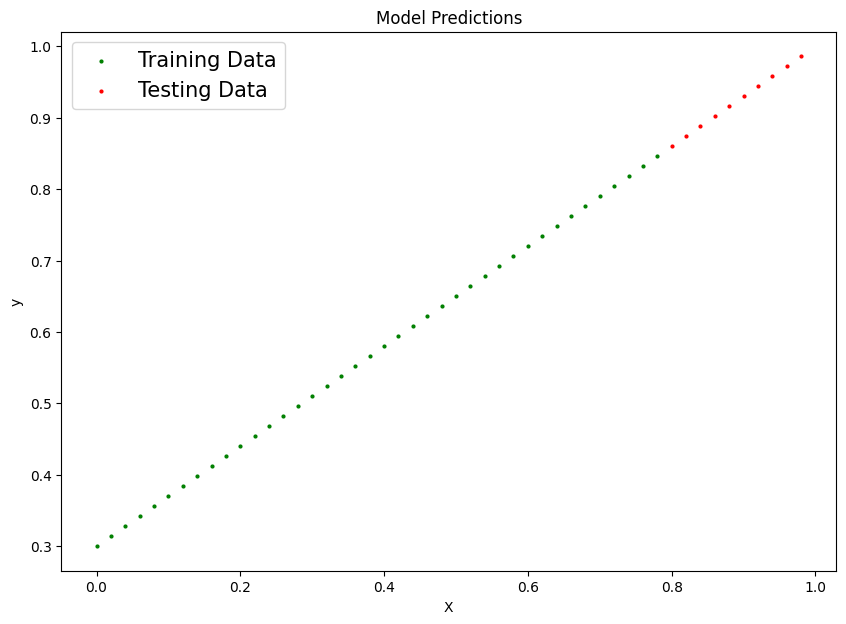

In [12]:

# %%
#split data 

train_split = int(0.8*len(X))

train_X , train_y = X[:train_split] , y[:train_split]
test_X , test_y = X[train_split:] , y[train_split:]

len(train_X), len(train_y), len(test_X), len(test_y)

# %%
# plot the data

plot_predictions(train_X,train_y,test_X,test_y)


In [13]:

# %% [markdown]
# ### Additional Linear Regression Model (Model V2)


# %%
# Define the linear regression model with nn.Linear layer
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super(LinearRegressionModelV2, self).__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(model_1.state_dict())

OrderedDict({'linear_layer.weight': tensor([[0.7645]]), 'linear_layer.bias': tensor([0.8300])})


In [14]:

# %%

# Model setup
model_1 = model_1.to(device)

# %%

In [15]:

# Setting up the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.02)

# %%

In [16]:

# Training loop for Model V2
epochs = 200
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(train_X)
    loss = loss_fn(y_pred, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.no_grad():
        test_pred = model_1(test_X)
        test_loss = loss_fn(test_pred, test_y)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")
        print(model_1.state_dict())

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5605052709579468
OrderedDict({'linear_layer.weight': tensor([[0.7567]]), 'linear_layer.bias': tensor([0.8100])})
Epoch: 10 | Loss: 0.3247582018375397 | Test Loss: 0.2910855710506439
OrderedDict({'linear_layer.weight': tensor([[0.6787]]), 'linear_layer.bias': tensor([0.6100])})
Epoch: 20 | Loss: 0.09433833509683609 | Test Loss: 0.021665770560503006
OrderedDict({'linear_layer.weight': tensor([[0.6007]]), 'linear_layer.bias': tensor([0.4100])})
Epoch: 30 | Loss: 0.020043734461069107 | Test Loss: 0.04584217071533203
OrderedDict({'linear_layer.weight': tensor([[0.6035]]), 'linear_layer.bias': tensor([0.3400])})
Epoch: 40 | Loss: 0.01318376325070858 | Test Loss: 0.029297202825546265
OrderedDict({'linear_layer.weight': tensor([[0.6379]]), 'linear_layer.bias': tensor([0.3260])})
Epoch: 50 | Loss: 0.006306151859462261 | Test Loss: 0.012752264738082886
OrderedDict({'linear_layer.weight': tensor([[0.6722]]), 'linear_layer.bias': tensor([0.3120])}

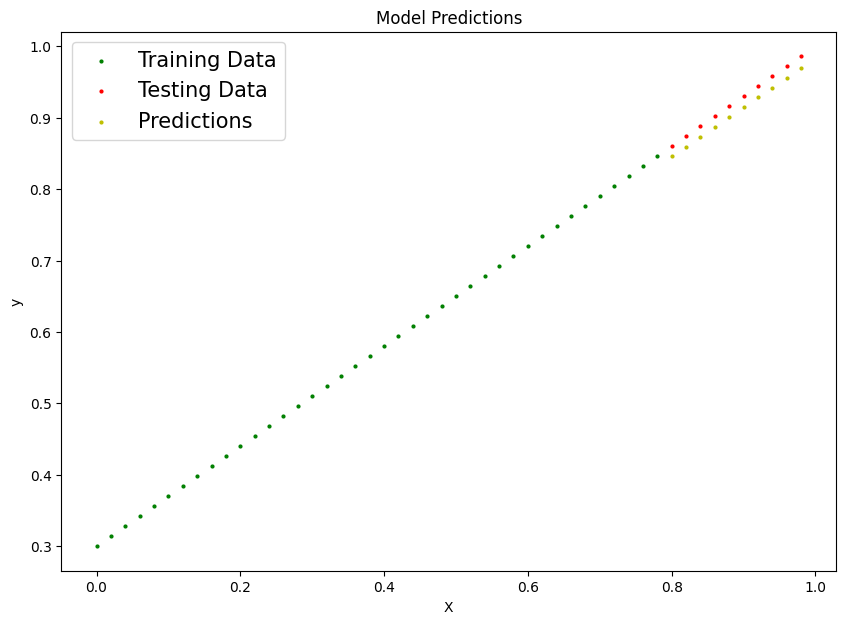

In [17]:

# %%

# Plot predictions for Model V2
model_1.eval()
with torch.no_grad():
    y_pred_v2 = model_1(test_X)

plot_predictions(predictions=y_pred_v2)


In [18]:
#saving the model 

from pathlib import Path
Model_Path = Path('models')
Model_Path.mkdir(parents=True , exist_ok=True)

Model_name = '01_Model_python_workflow_01.pth'

Model_save_path = Model_path / Model_name

Model_save_path

PosixPath('models/01_Model_python_workflow_01.pth')

In [19]:
# saving the model path state dict 

print(f"Saving model to {Model_save_path}")

torch.save(obj=model_1.state_dict(), f=Model_save_path)


Saving model to models/01_Model_python_workflow_01.pth


In [20]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6872]])),
             ('linear_layer.bias', tensor([0.2960]))])

In [21]:
#Load a pytorch model

# creating a new instance for RegressionModelV2

load_model_1 = LinearRegressionModelV2()

# Load the save model state_dict

load_model_1.load_state_dict(torch.load(Model_save_path))

load_model_1.to(device)

/tmp/ipykernel_29489/282364872.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model_1.load_state_dict(torch.load(Model_save_path))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [22]:
next(load_model_1.parameters()).device

device(type='cpu')

In [23]:
load_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6872]])),
             ('linear_layer.bias', tensor([0.2960]))])

In [24]:
load_model_1.eval()

with torch.inference_mode():
    load_model_1_preds = load_model_1(test_X)
y_pred_v2 == load_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])